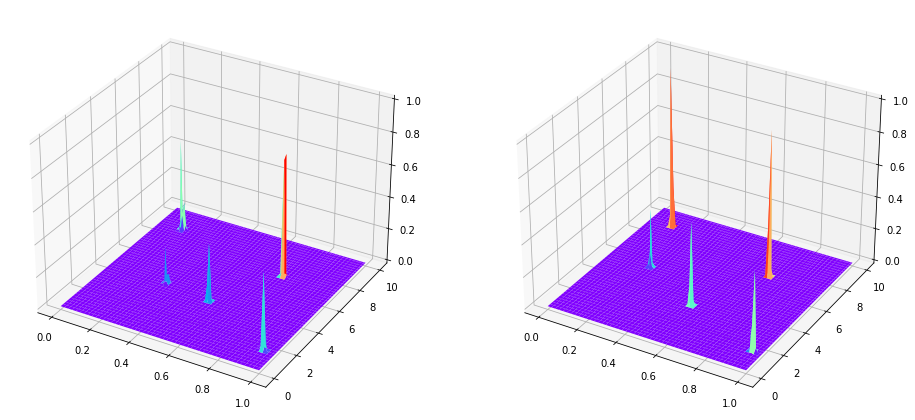

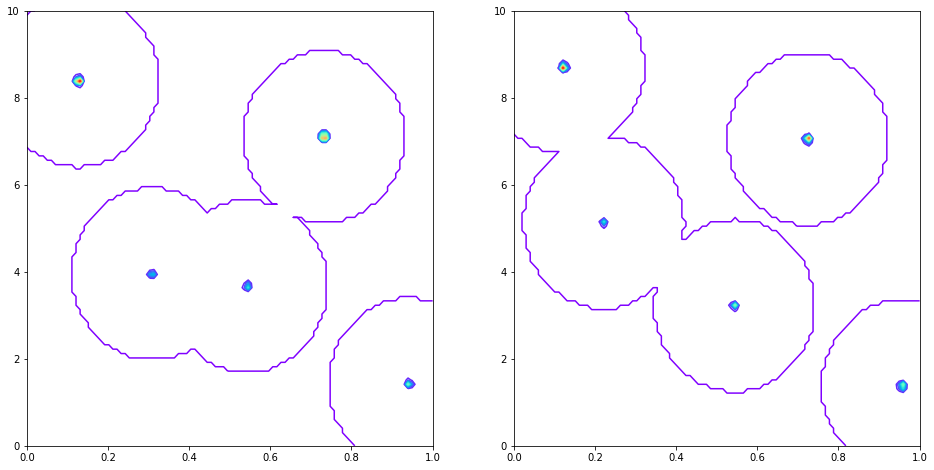

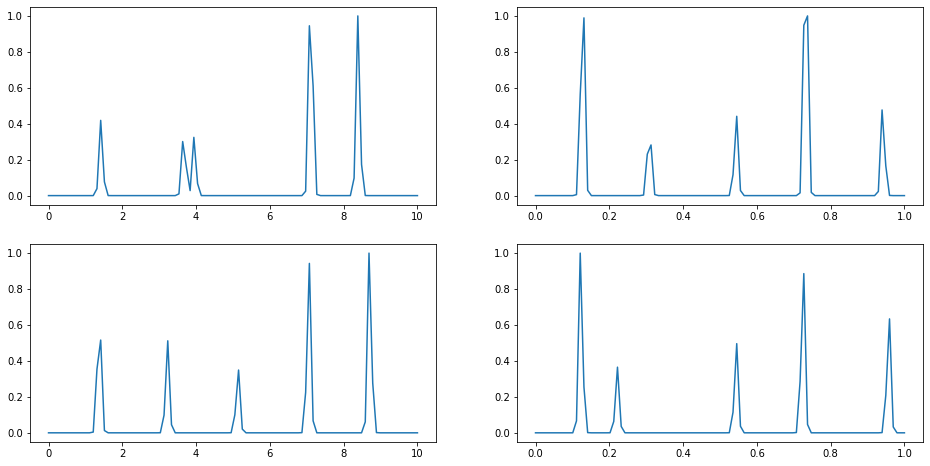

In [7]:
import os
import numpy as np
import pandas as pd
import scipy.io as scio 
import matplotlib.pyplot as plt
from datetime import datetime

def Gaussian_distribution(max_D, avg, num, sig):
    avg = avg.T
    xgrid = np.linspace(0, max_D, num)
    sqrt_2pi=np.power(2*np.pi,0.5)
    coef=1/(sqrt_2pi*sig)
    powercoef=-1/(2*np.power(sig,2))
    mypow=powercoef*(np.power((xgrid-avg),2))
    result = coef*(np.exp(mypow))
    return result/np.max(result, 1)[:, np.newaxis]

max_D = 10
max_T2 = 1
sig_D = 0.05
sig_T2 = 0.005
D_label_dim = 100
T2_label_dim = 100

sub_path = os.listdir('Net_Results/Laplace2D')
sub_path.sort(key=lambda x: datetime.strptime(x, "%Y-%m-%d-%H_%M_%S"))
result_path = 'Net_Results/Laplace2D/' + sub_path[-1]
# result_path = 'Net_Results/Laplace2D/2022-12-25-16_21_32'
label = scio.loadmat('data/Laplace2D/S6_net_input.mat')['label']

D = pd.read_csv(f'{result_path}/best_diffusion_coeffs.csv').columns.to_numpy(
    dtype=np.float32
)
T2 = pd.read_csv(f'{result_path}/best_relax_time.csv').columns.to_numpy(
    dtype=np.float32
)
amp = pd.read_csv(f'{result_path}/best_amplitude.csv').columns.to_numpy(
    dtype=np.float32
)
# D = pd.read_csv(f'{result_path}/diffusion_coeffs.csv').columns.to_numpy(
#     dtype=np.float32
# )
# T2 = pd.read_csv(f'{result_path}/relax_time.csv').columns.to_numpy(
#     dtype=np.float32
# )
# amp = pd.read_csv(f'{result_path}/amplitude.csv').columns.to_numpy(
#     dtype=np.float32
# )

result_D = Gaussian_distribution(max_D, D[np.newaxis, :], D_label_dim, sig=sig_D)
result_T2 = Gaussian_distribution(max_T2, 1 / T2[np.newaxis, :], T2_label_dim, sig=sig_T2)

result_label = np.zeros([D_label_dim, T2_label_dim]).astype(float)
for j in np.arange(len(D)):
    result_label = result_label + amp[j] * np.dot(result_D[j, :][:, np.newaxis], result_T2[j, :][np.newaxis, :])
result_label = result_label / np.max(result_label)

figure = plt.figure(figsize=[16, 8])
axes1 = figure.add_subplot(121, projection='3d')
axes2 = figure.add_subplot(122, projection='3d')

X = np.linspace(0, 1, 100)
Y = np.linspace(0, 10, 100)

X,Y = np.meshgrid(X, Y)
axes1.plot_surface(X,Y,result_label,cmap='rainbow')
axes2.plot_surface(X,Y,label,cmap='rainbow')

plt.figure(figsize=[16, 8])
plt.subplot(1, 2, 1)
plt.contour(np.linspace(0, 1, 100), np.linspace(0, 10, 100), result_label, 20, cmap='rainbow')
plt.subplot(1, 2, 2)
plt.contour(np.linspace(0, 1, 100), np.linspace(0, 10, 100), label, 20, cmap='rainbow')
plt.show()

plt.figure(figsize=[16, 8])
plt.subplot(2, 2, 1)
plt.plot(np.linspace(0, 10, 100), np.sum(result_label, axis=1).T / np.max(np.sum(result_label, axis=1)))
plt.subplot(2, 2, 3)
plt.plot(np.linspace(0, 10, 100), np.sum(label, axis=1).T / np.max(np.sum(label, axis=1)))

plt.subplot(2, 2, 2)
plt.plot(np.linspace(0, 1, 100), np.sum(result_label, axis=0).T / np.max(np.sum(result_label, axis=0)))
plt.subplot(2, 2, 4)
plt.plot(np.linspace(0, 1, 100), np.sum(label, axis=0).T / np.max(np.sum(label, axis=0)))